# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df_1 = pd.read_csv(adultDataSet_filename, header=0)
df_2 = pd.read_csv(airbnbDataSet_filename, header=0)
df_3 = pd.read_csv(WHRDataSet_filename, header=0)
df_4 = pd.read_csv(bookReviewDataSet_filename, header=0)

df = df_1

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1) I chose the first data set, the census data set.
2) I will be predicting the level of education of the person. The label will be ['education']
3) This would be a supervised learning problem. This would be a classification problem. It would be a multi-class classification problem.
4) My features would be age, workclass, number of years of education, marital-status, occupation, relationship, race, capital-gain, and etc.
5) A company could find value in the type of education finished by identifying areas or demographics with lower education attainment and allocating resources to these areas that may need it.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
#Drop fnlwgt, income_binary, education-num bc of leakage.
#Drop features that can cause bias: race, sex_selfID, native-country.

df.drop(columns=['fnlwgt', 'income_binary', 'race', 'sex_selfID', 'native-country', 'education-num'], inplace=True)

In [4]:
df.dtypes

age               float64
workclass          object
education          object
marital-status     object
occupation         object
relationship       object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
dtype: object

In [5]:
df.shape

(32561, 9)

In [6]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,2174,0,40.0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,0,0,13.0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,0,0,40.0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40.0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,0,0,40.0


In [7]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [8]:
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['workclass', 'education', 'marital-status', 'occupation', 'relationship']

In [9]:
df[to_encode].nunique()
#one hot encoding: workclass, marital-status, relationship, occupation

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
dtype: int64

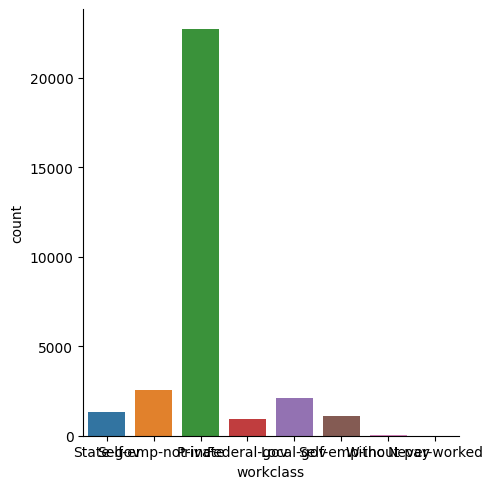

In [10]:
sns.catplot(df, x="workclass", kind="count")
df['workclass'] = df['workclass'].fillna(value="Private")
df_workclass = pd.get_dummies(df['workclass'], prefix='workclass_')
df = df.join(df_workclass)
df.drop(columns = 'workclass', inplace=True)

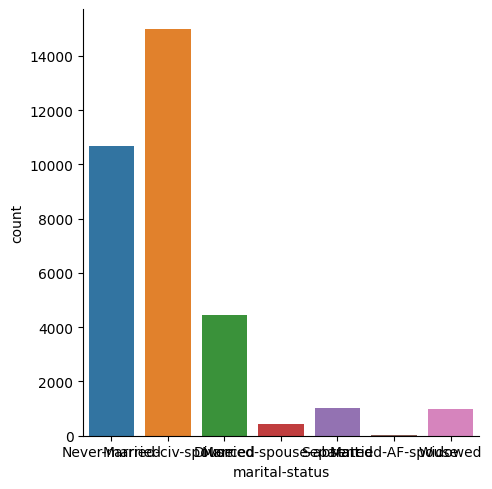

In [11]:
sns.catplot(df, x="marital-status", kind="count")
df_marital_status = pd.get_dummies(df['marital-status'], prefix='marital-status_')
df = df.join(df_marital_status)
df.drop(columns = 'marital-status', inplace=True)

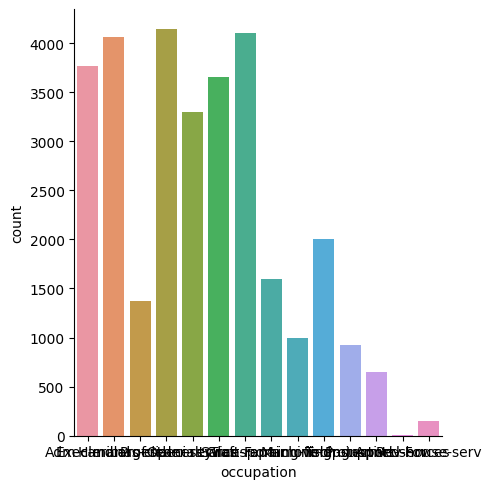

In [12]:
sns.catplot(df, x="occupation", kind="count")
df['occupation'] = df['occupation'].fillna(value="Prof-specialty")
df_occupation = pd.get_dummies(df['occupation'], prefix='occupation_')
df = df.join(df_occupation)
df.drop(columns = 'occupation', inplace=True)

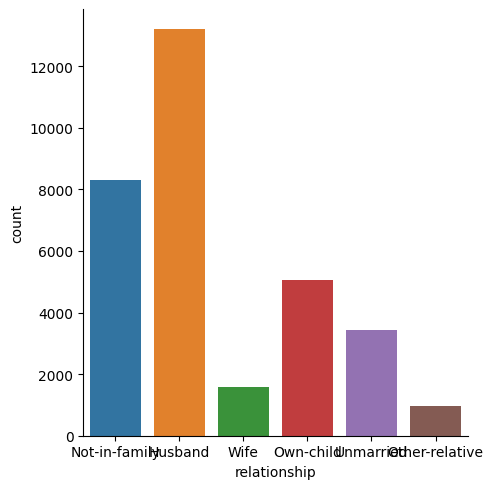

In [13]:
sns.catplot(df, x="relationship", kind="count")
df_relationship = pd.get_dummies(df['relationship'], prefix='relationship_')
df = df.join(df_relationship)
df.drop(columns = 'relationship', inplace=True)

In [14]:
#df['occupation'].unique()

In [15]:
#df['occupation'].value_counts()

In [16]:
#age, workclass, occupation, hours-per-week have missing values.
np.sum(df.isnull(), axis=0)

age                                      162
education                                  0
capital-gain                               0
capital-loss                               0
hours-per-week                           325
workclass__Federal-gov                     0
workclass__Local-gov                       0
workclass__Never-worked                    0
workclass__Private                         0
workclass__Self-emp-inc                    0
workclass__Self-emp-not-inc                0
workclass__State-gov                       0
workclass__Without-pay                     0
marital-status__Divorced                   0
marital-status__Married-AF-spouse          0
marital-status__Married-civ-spouse         0
marital-status__Married-spouse-absent      0
marital-status__Never-married              0
marital-status__Separated                  0
marital-status__Widowed                    0
occupation__Adm-clerical                   0
occupation__Armed-Forces                   0
occupation

In [17]:
df['education'].head

<bound method NDFrame.head of 0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object>

<AxesSubplot: xlabel='age', ylabel='Count'>

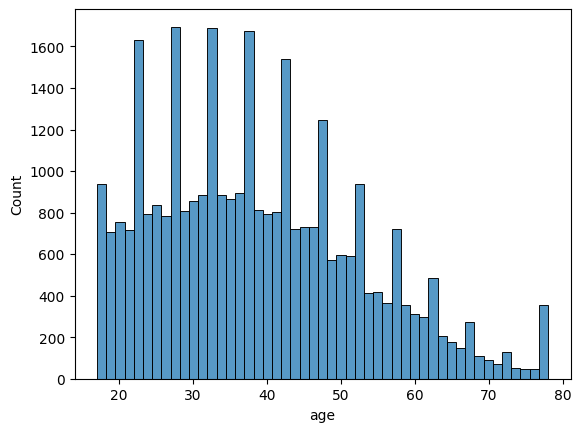

In [18]:
#cleaning 'age'
import scipy.stats as stats
df['age'] = stats.mstats.winsorize(df['age'], limits=[0.01, 0.01])
df['age'] = df['age'].fillna(df['age'].mean())
sns.histplot(data=df, x="age")

<AxesSubplot: xlabel='capital-gain', ylabel='Count'>

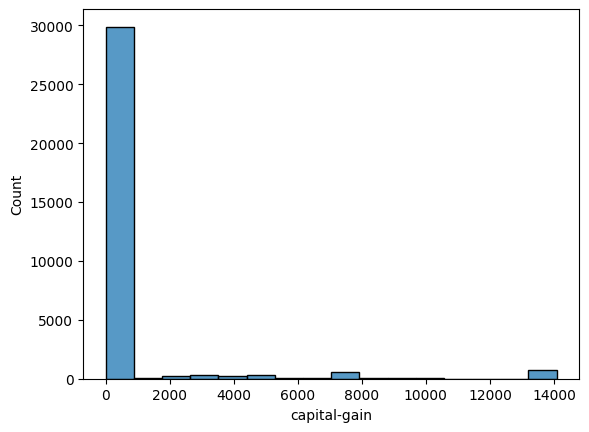

In [19]:
#capital-gain cleaned
df['capital-gain'] = stats.mstats.winsorize(df['capital-gain'], limits=[0.01, 0.01])
df['capital-gain'] = df['capital-gain'].fillna(df['capital-gain'].mean())
sns.histplot(data=df, x="capital-gain")

<AxesSubplot: xlabel='capital-loss', ylabel='Count'>

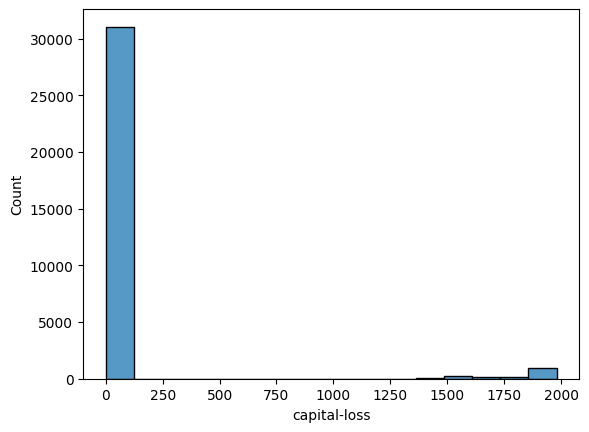

In [20]:
#capital-loss cleaned
df['capital-loss'] = stats.mstats.winsorize(df['capital-loss'], limits=[0.01, 0.01])
df['capital-loss'] = df['capital-loss'].fillna(df['capital-loss'].mean())
sns.histplot(data=df, x="capital-loss")

<AxesSubplot: xlabel='hours-per-week', ylabel='Count'>

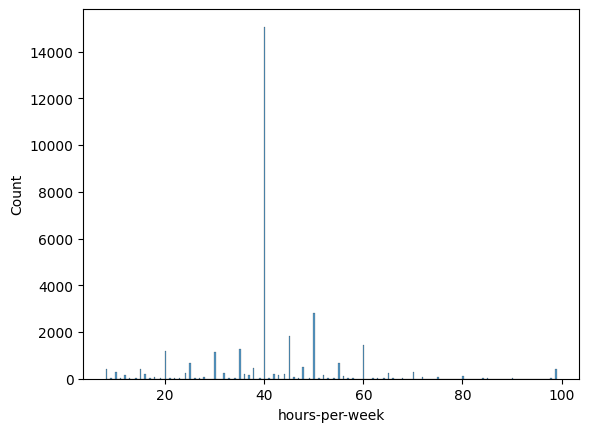

In [21]:
#hours-per-week cleaned
df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])
df['hours-per-week'] = df['hours-per-week'].fillna(df['hours-per-week'].mean())
sns.histplot(data=df, x="hours-per-week")

In [22]:
df.shape

(32561, 40)

In [23]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count

age                                      0
education                                0
capital-gain                             0
capital-loss                             0
hours-per-week                           0
workclass__Federal-gov                   0
workclass__Local-gov                     0
workclass__Never-worked                  0
workclass__Private                       0
workclass__Self-emp-inc                  0
workclass__Self-emp-not-inc              0
workclass__State-gov                     0
workclass__Without-pay                   0
marital-status__Divorced                 0
marital-status__Married-AF-spouse        0
marital-status__Married-civ-spouse       0
marital-status__Married-spouse-absent    0
marital-status__Never-married            0
marital-status__Separated                0
marital-status__Widowed                  0
occupation__Adm-clerical                 0
occupation__Armed-Forces                 0
occupation__Craft-repair                 0
occupation_

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1) My new feature list includes: age, workclass, marital-status,
       occupation, relationship, capital-gain, capital-loss,
       hours-per-week. workclass, marital-status, occupation, and relationship have been one hot encoded so there are a little more features.
2) I removed outliers, filled in null values with either mean for numerical and mode for categorical values.
3) I would like to create a Random Forest model and a GBDT model. I'll probably also use an Ensemble model as well.
4) I first want to try the RF and GBDT first with generic parametrics, then I'll evaluate the model and then retrain the models with optimized metrics using GridSearchCV

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report
import time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [25]:
y = df['education']
X = df.drop(columns = 'education', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [27]:
#generic parameters to test for now.
param_grid_RF = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}

In [28]:
param_grid_GBDT = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}

In [29]:
t0 = time.time()
rf_class = RandomForestClassifier(criterion='entropy', random_state=1234)
grid_search_rf = GridSearchCV(estimator=rf_class, param_grid=param_grid_RF, cv=3)
grid_search_rf.fit(X_train, y_train)
t1 = time.time()
print(t1-t0)

72.67453932762146


In [30]:
best_params_rf = grid_search_rf.best_estimator_
best_params_rf

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300,
                       random_state=1234)

In [31]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300, random_state=1234)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300,
                       random_state=1234)

In [32]:
# This cell box had an entire GBDT model but 
#it was taking around 10 minutes to GridSearch and train,
# and every single time, my kernel would unexpectedly die while
# it was doing its thing. 

In [33]:
y_rf_preds = rf_model.predict_proba(X_test)
rf_pred = rf_model.predict(X_test)
y_rf_predictions = list(y_rf_preds[: -1])

In [34]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

        10th       0.25      0.01      0.03       277
        11th       0.49      0.19      0.27       363
        12th       0.00      0.00      0.00       133
     1st-4th       0.00      0.00      0.00        57
     5th-6th       0.00      0.00      0.00        97
     7th-8th       0.00      0.00      0.00       177
         9th       0.00      0.00      0.00       142
  Assoc-acdm       0.00      0.00      0.00       312
   Assoc-voc       0.00      0.00      0.00       429
   Bachelors       0.37      0.46      0.41      1628
   Doctorate       0.44      0.03      0.06       115
     HS-grad       0.41      0.85      0.55      3174
     Masters       0.38      0.06      0.11       534
   Preschool       0.00      0.00      0.00        18
 Prof-school       0.41      0.24      0.31       148
Some-college       0.52      0.19      0.27      2165

    accuracy                           0.41      9769
   macro avg       0.20   

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [35]:
# With the results above, the model is struggling with lots of the classes.
# I looked at online documentation and I wanted to redo my gridsearch with more hyperparams being used.

In [36]:
param_grid_RF2 = {'n_estimators': [100, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

In [37]:
rf2 = RandomForestClassifier(criterion='entropy', random_state=1234)
grid_search_rf2 = GridSearchCV(estimator=rf2, param_grid=param_grid_RF2, cv=5)
grid_search_rf2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=1234),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]})

In [39]:
best_params_rf2 = grid_search_rf2.best_estimator_
best_params_rf2

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300,
                       random_state=1234)

In [ ]:
# The new Grid Search gave me the same hypermparameters as the first.
# The new hyperparameters that I listed like min_samples_leaf didn't even pop up.
# I'm assuming the default parameters but I'm not going to test the model as it should just bring the same results. 
# I would need to do more fair AI evaluation.